# МАРКЕТИНГОВЫЕ МЕРОПРИЯТИЯ


### Заказчик: крупный интеренет-магазин
### Цель: увеличение выручки

### Ход исследования:
1. Подготовка гипотиз и их приоритизация по методам ICE, RICE
2. Проведение А/В теста и проверка результатов по параметрам:
-  кумулятивная выручка по группам
-  кумулятивный средний чек по группам
-  относительное изменение кумулятивного среднего чека группы B к группе A
-  кумулятивное среднее количество заказов на посетителя по группам
-  относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A
-  95-й и 99-й перцентили количества заказов на пользователя
-  95-й и 99-й перцентили стоимости заказов
-  cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
-  статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
-  статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
-  статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

### Выводы и рекомендации

**Изучение данных**

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats

In [2]:
data= pd.read_csv('/datasets/hypothesis.csv', sep=',')
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


**Приоритизация гипотез**

**Метод ICE**

In [3]:
ICE=(data['Impact']*data['Confidence'])/data['Efforts']
print(ICE.sort_values(ascending=False))

8    16.200000
0    13.333333
7    11.200000
6     8.000000
2     7.000000
1     2.000000
5     1.333333
3     1.125000
4     1.000000
dtype: float64


**Метод RICE**

In [4]:
RICE=(data['Reach']*data['Impact']*data['Confidence'])/data['Efforts']
print(RICE.sort_values(ascending=False))

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
dtype: float64


**Вывод**
```
Приоритизация гипотез была провведена двумя методами со следующими результатами: 
- ICE, ТОП-3 гипотизы №8, №0, №7
- RICE ТОП-3 гипотизы №7,2,0, при этом гипотиза №8 оказалась на 5-м месте

Различие приотитетов возникло из-за параметра Reach (охвата).
У гипотиз №0, №7, №8 высокие значения параметров Impact и Confidence (от 7 до 10 баллов)  при среднем значении Efforts (от 5 до 5 баллов)
А вот параметр Reach у гипотезы №0 и №8 очень низкий и составляет 3 и 1 балл соответственно, в то время как у гипотизы №7 Reach равен 10. Таким образом по методу RICE гипотеза №7 получила наивысший приоритет.
```

**Анализ А/В теста**

In [5]:
orders= pd.read_csv('/datasets/orders.csv', sep=',') 
visitors= pd.read_csv('/datasets/visitors.csv', sep=',')
display(orders.head())
display(visitors.head())
orders.info()
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
# Тип данных в колонках date переведем в datetime

orders['date'] = orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#проверим тип данных после замены
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<b>Предподготовка данных</b>


In [7]:
# проверка на дубликаты в таблице заказов.
# один посетитель может следать 2 заказа и даже в 1 день, это не является дублем.
# но дублями будут считаться повторные номера в transactionId

orders['transactionId'].duplicated().sum()


0

In [8]:
# проверим есть ли полные дубли строк
orders.duplicated().sum()

0

In [9]:
# также проверим пересекаются ли группы А и В по visitorId 

In [10]:
orders=orders.sort_values(by='date')

orders_groups = orders[['visitorId', 'group', 'date']]

orders_A=orders_groups[orders_groups['group'] == 'A']

orders_B = orders_groups[orders_groups['group'] == 'B']
                     
A_B_users=orders_A.merge(orders_B, on='visitorId', how='inner')

display(A_B_users)
print('Количество уникальных посетителей, которые одновременно присуствуют в группе А и В:', A_B_users['visitorId'].nunique())
print('Количество уникальных посетителей всего в тесте:', orders['visitorId'].nunique())
print('Доля уникальных пользователей,  которые одновременно присуствуют в группе А и В :', A_B_users['visitorId'].nunique()/orders['visitorId'].nunique())

,visitorId,group_x,date_x,group_y,date_y
0,4256040402,A,2019-08-01,B,2019-08-08
1,4256040402,A,2019-08-01,B,2019-08-16
2,4256040402,A,2019-08-01,B,2019-08-18
3,4256040402,A,2019-08-01,B,2019-08-31
4,4256040402,A,2019-08-12,B,2019-08-08
...,...,...,...,...,...
178,4120364173,A,2019-08-29,B,2019-08-31
179,477780734,A,2019-08-30,B,2019-08-30
180,3766097110,A,2019-08-30,B,2019-08-30
181,2600415354,A,2019-08-31,B,2019-08-06


Количество уникальных посетителей, которые одновременно присуствуют в группе А и В: 58
Количество уникальных посетителей всего в тесте: 1031
Доля уникальных пользователей,  которые одновременно присуствуют в группе А и В : 0.05625606207565471



Обнаружили 183 (15%) наблюдения из 1197, по которым 58 (5,6%) из 1031 пользователей попали в обе группы тестирования.
15% - это значительная часть выборки, но она лишена чистоты эксперимента, то есть не очевидно пользователь в какую группу должен был попасть изначально. При этом есть варианты, когда один и тот же посетитель попал в обе группы в один день и сделал заказ.
В связи с этим считаю целесообразным очистить датасет от некорректных данных (их не возможно интерпритировать), при этом это 5,6% от уникального числа пользователей.


In [11]:
# создадим список уникаьных visitorId и удалим их из таблицы orders

A_B_users['visitorId'].unique()

array([4256040402, 2716752286, 2038680547, 3891541246, 3984495233,
       2458001652,  471551937, 1801183820,  351125977, 1333886533,
          8300375, 2587333274, 1602967004, 1294878855, 1230306981,
       3972127743, 2378935119, 1404934699,  199603092,  276558944,
        237748145, 3062433592, 1614305549,  963407295, 3963646447,
       4186807279, 2949041841, 2654030115, 2712142231, 3803269165,
       4069496402, 2954449915, 2579882178, 3957174400, 1648269707,
       3234906277,  393266494, 3717692402, 3941795274, 1738359350,
        457167155, 2686716486, 3656415546, 2927087541, 3202540741,
       2044997962, 1959144690, 1316129916, 1668030113, 2780786433,
        818047933, 3951559397, 4266935830, 4120364173,  477780734,
       3766097110, 2600415354,  232979603])

In [12]:
list=[4256040402, 2716752286, 3984495233, 3891541246, 2038680547,
       2458001652,  471551937, 1801183820, 1333886533,  351125977,
          8300375, 2587333274, 1602967004, 1294878855, 1230306981,
       3972127743, 2378935119, 1404934699, 3062433592,  199603092,
        237748145,  276558944, 3963646447, 1614305549, 2712142231,
        963407295, 4186807279, 2654030115, 2949041841, 4069496402,
       3803269165, 2954449915, 3234906277, 1648269707, 3957174400,
       2579882178,  393266494, 3941795274, 3717692402, 1738359350,
       2927087541, 3656415546,  457167155, 2686716486, 2044997962,
       3202540741, 1959144690, 1668030113, 1316129916,  818047933,
       2780786433, 4120364173, 3951559397, 4266935830, 3766097110,
        477780734, 2600415354,  232979603]


In [13]:
orders = orders.query('visitorId not in @list')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 168 to 959
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB



Проверка дублей в таблице 

In [14]:
# в данной таблице будет странно, если выявится 100% или дубль по колонкам: дата, группа.
visitors.duplicated().sum()


0

In [15]:
visitors[visitors.duplicated(subset=['group', 'date'], keep=False)]

,date,group,visitors


<b>Вывод:</b>
в таблицах orders и visitors дубли не обнаружены.
Но в таблице заказов были выявлены 183 (15%) наблюдения из 1197, по которым 58 (5,6%) из 1031  пользователей попали в обе группы. Такие пользователи были исключены из общей таблицы
</div>

**Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


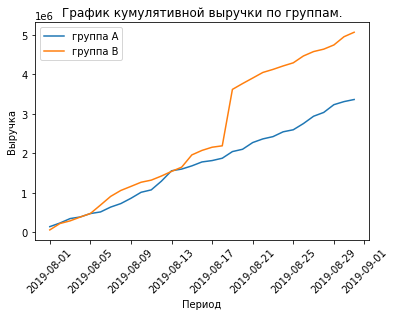

In [17]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам.')
plt.ylabel('Выручка')
plt.xlabel('Период')
plt.xticks(rotation=45)
plt.legend(['группа А', 'группа В'])
plt.show()


**Вывод**
```
Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. 
Однако график выручки группы В имет резкий скачек роста. Возможно это скачек числа заказов или очень дорогие заказы, которые можно назвать выбросами.
```

**Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

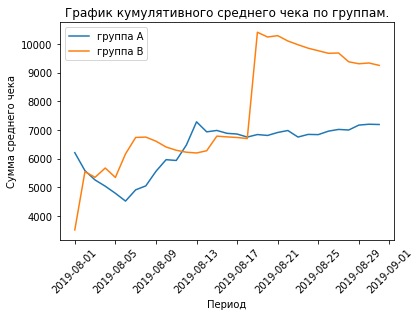

In [18]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам.')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Период')
plt.xticks(rotation=45)
plt.legend(['группа А', 'группа В'])
plt.show()


**Вывод**
```
В группе А вначале теста наблюдаются скачки по значениям среднего чека, но со второй половины теста значения выравниваются. Вероятно,  вначале теста были очень дешевые заказы.
А вот в группе В круных и дорогих покупок было много вначале и в середине теста. Даже к концу теста средний чек не выровнился и имеет низспадающий тренд. Этой группе нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне, то есть тест нужно продолжить
Вероятно, в данных есть выбросы и тест требует проверки на корректность его проведения. Не бывает так, чтобы две группы так заметно отличались друг от друга.
```


**Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

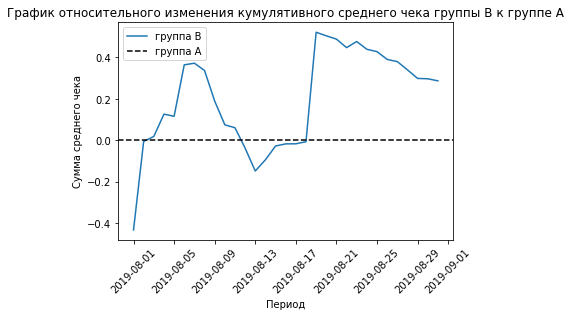

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                   right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Сумма среднего чека')
plt.xlabel('Период')
plt.xticks(rotation=45)
plt.legend(['группа В', 'группа А'])
plt.show()

**Вывод**
```
На протяжении всего графика в группе В наблюдаются скачки значений среднего чека. Это свидетельствует, что в данных есть выбросы как в сторону очень дешевых так и в строну очень дорогих заказов относительно группы А.
```

**Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

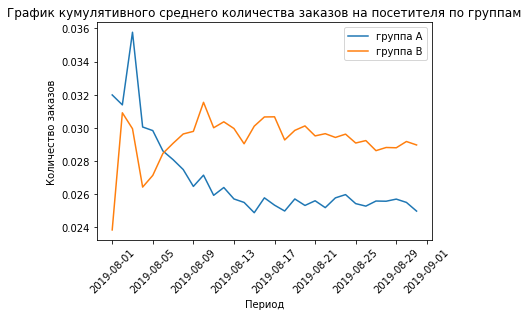

In [20]:
# датафрейм с кумулятивным количеством заказов и посетителей по дням в группе А
cumulativeOrder_A_for_user = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]

# датафрейм с кумулятивным количеством заказов и посетителей по дням в группе B
cumulativeOrder_B_for_user = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

# Строим график среднего количества заказов на посетителя группы А
plt.plot(cumulativeOrder_A_for_user['date'], cumulativeOrder_A_for_user['orders']/cumulativeOrder_A_for_user['visitors'], label='A')

# Строим график среднего количества заказов на посетителя группы B
plt.plot(cumulativeOrder_B_for_user['date'], cumulativeOrder_B_for_user['orders']/cumulativeOrder_B_for_user['visitors'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Количество заказов')
plt.xlabel('Период')
plt.xticks(rotation=45)
plt.legend(['группа А', 'группа В'])
plt.show()

**Вывод**
```
В группе А в начале теста появился посетитель, который сделал необычно много заказов, но потом значения количетсва заказов на посетилетя выровнялось.
В группе В в начале и в середине теста были пользователи с большим количеством заказов. Ближе к конце теста количество заказов на 1 пользователя стало выравниваться.
```

**Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

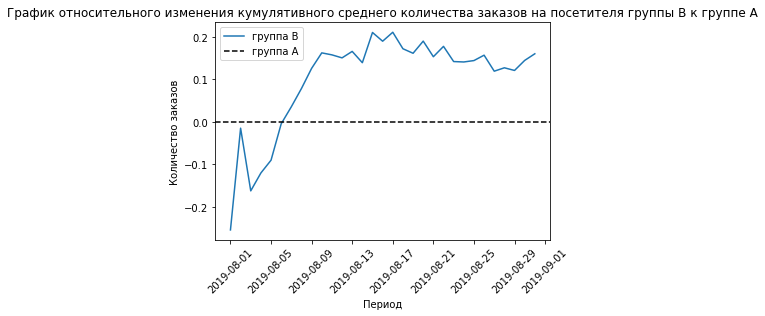

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeOrder = cumulativeOrder_A_for_user.merge(cumulativeOrder_B_for_user, left_on='date',
                                                   right_on='date', how='left', suffixes=['A', 'B'])
# print(mergedCumulativeOrder)
# cтроим отношение среднего количества заказов на посетителя
plt.plot(mergedCumulativeOrder['date'], (mergedCumulativeOrder['ordersB']/mergedCumulativeOrder['visitorsB'])
          /(mergedCumulativeOrder['ordersA']/mergedCumulativeOrder['visitorsA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Количество заказов')
plt.xlabel('Период')
plt.xticks(rotation=45)
plt.legend(['группа В', 'группа А'])
plt.show()

**Вывод**
```
В группе В посетители были склонны делать больше заказов примерно на 10-15%, чем в группе А, хотя в начале наблюдался значительное отставание от группы А
```

**Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


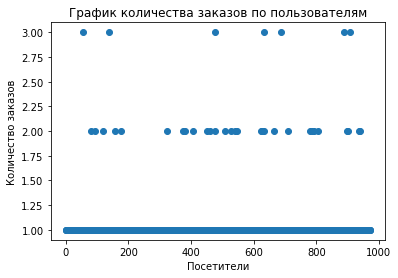

In [22]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Посетители')
# plt.legend(['группа В', 'группа А'])
plt.show()


**Выводы**
```
Основная доля посетителей делает 1 заказ, чуть реже 2 заказа. 
Количество заказов больше 2х уже скорее редкость.

```

**Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [23]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


   
<b>Вывод: </b> типично для этого интернет магазина 1 заказ для 1 посетителя. Таким образом, верхняя граница параметра orders 1. 
</div>


**Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

         orders  revenue
143   590470918  1294500
939  3936777065   202740
161   666610489    92550
875  3668308183    86620
850  3603576309    67990
311  1348774318    66350
71    316924019    65710
310  1347999392    60450
585  2420050534    58550
738  3163614039    53904


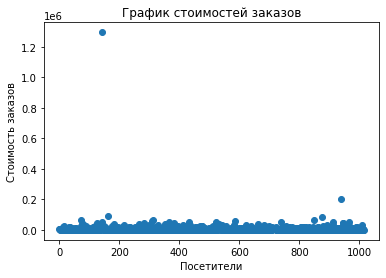

In [24]:
orders_orders_revenue = (
    orders.groupby('transactionId', as_index=False)
    .agg({'revenue': 'sum'})
)

orders_orders_revenue.columns = ['orders', 'revenue']

print(orders_orders_revenue.sort_values(by='revenue', ascending=False).head(10)) 

x_values = pd.Series(range(0,len(orders_orders_revenue)))

plt.scatter(x_values, orders_orders_revenue['revenue'])
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Посетители')
# plt.xticks(rotation=45)
# plt.legend(['группа В', 'группа А'])
plt.show()

**Вывод**
```
Сумма основной части заказов не более 100тр. На графике наблюдается 2 выброса: чуть более 200'000 и более 1,2млн. Последние значение может оказать существенное влияние на результаты тестирования.
```

**Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [25]:
print(np.percentile(orders_orders_revenue['revenue'], [95, 99])) 

[26785. 53904.]


  
<b>Вывод: </b> типичная сумма заказа для этого интернет магазина 26785. Таким образом, верхняя граница параметра revenue 26785. 
</div>

**Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

```
Нулевая: различий в среднем количестве заказов между группами нет.
Альтернативная: различия в среднем между группами есть.
```

In [26]:
# подготовка данных для рассчета стат.значимости
    
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

df = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(df.head(5)) 


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 



sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum()
                                                                           - len(ordersByUsersA['orders'])),
                                                        name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum()
                                                                           - len(ordersByUsersB['orders'])),
                                                        name='orders')], axis=0) 

print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное преимущество группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value: 0.011
Относительное преимущество группы B: 0.160



<b>Вывод: </b> По «сырым» данным различий в среднем числе заказов групп A и B нет. 
Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, ОТВЕРГАЕМ. Относительное преимущество группы B равно 16%.
Полагаю, что аномальные значения в группе В дают такое преимущество над группой А. 


**Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Гипотезы:
    
-  H0 - Нет  различий в среднем чеке заказа между группами по "сырым" данным
-  H1 - Есть различия в среднем чеке заказа между группами по "сырым" данным
  

In [28]:
# статистическая значимость различий в среднем чеке
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))


# относительные различия в среднем чеке между группами
print('относительные различия в среднем чеке между группами', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


P-value: 0.829
относительные различия в среднем чеке между группами 0.287



<b>Вывод:</b>
    
    p-value равно 0,829, что больше 0,05. Не получилось отвергнуть нулевую гипотезу. В среднем чеке заказа между группами по "сырым" данным нет. Наблюдаемое различие в среднем чеке между группами в 28,7% не является статистически значимым.

</div>



**Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**


Гипотезы:
    
-  H0 - Нет  различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
-  H1 - Есть различия в среднем количестве заказов на посетителя между группами по «очищенным» данным
  
</div>


In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-value:''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительные различия между группами', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


p-value:0.016
относительные различия между группами 0.174



<b>Вывод:</b> Нулевую гипотезу ОТВЕРГАЕМ. Различий в среднем количестве заказов на посетителя между группами по «очищенным» данным ЕСТЬ.
</div>

**Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

Гипотезы:
    
-  H0 - Нет  различий  в среднем чеке заказа между группами по «очищенным» данным
-  H1 - Есть различия  в среднем чеке заказа между группами по «очищенным» данным
  
</div>

In [30]:
print('P-value', '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )]['revenue'],
            orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],)[1])
)

print("Относительные различия между группами", "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)) 


P-value 0.727
Относительные различия между группами -0.034


**Вывод**
```
P-value увеличился, но и разница между сегментами сократилась с 25.9% до -2%, то есть ранее группа В имела приемущество перед группой А, но по очищенным данным отстает от группы А на 2%.
```

### Общий вывод

Приоритизация гипотез была провведена двумя методами со следующими результатами: 
-  ICE, ТОП-3 гипотизы №8, №0, №7
-  RICE ТОП-3 гипотизы №7,2,0, при этом гипотиза №8 оказалась на 5-м месте

Различие приотитетов возникло из-за параметра Reach (охвата).
У гипотиз №0, №7, №8 высокие значения параметров Impact и Confidence (от 7 до 10 баллов)  при среднем значении Efforts (от 5 до 5 баллов)
А вот параметр Reach у гипотезы №0 и №8 очень низкий и составляет 3 и 1 балл соответственно, в то время как у гипотизы №7 Reach равен 10. Таким образом по методу RICE гипотеза №7 получила наивысший приоритет.

<b>Рекомендация</b> к тестированию гипотезы №7 - Добавить форму подписки на все основные страни...	так как это работа с сайтом и способ повышения конверсии или как минимум вовлеченность в сайт уже привлеченного пользователя.


#### Анализ А/В теста.
Была проведена оценка следующих параметров по данным тестирования:

1. кумулятивная выручка по группам: почти равномерно увеличивается в течение всего теста. Хороший знак. Однако график выручки группы В имет резкий скачек роста. Возможно это скачек числа заказов или очень дорогие заказы, которые можно назвать выбросами.

2. кумулятивный средний чек по группам: в группе А вначале теста наблюдаются скачки по значениям среднего чека, но со второй половины теста значения выравниваются. Вероятно,  вначале теста были очень дешевые заказы.
А вот в группе В круных и дорогих покупок было много вначале и в середине теста. Даже к концу теста средний чек не выровнился и имеет низспадающий тренд. Этой группе нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне, то есть тест нужно продолжить.

3. кумулятивное среднее количество заказов на посетителя по группам: В группе А в начале теста появился посетитель, который сделал необычно много заказов, но потом значения количетсва заказов на посетилетя выровнялось.
В группе В в начале и в середине теста были пользователи с большим количеством заказов. Ближе к конце теста количество заказов на 1 пользователя стало выравниваться.

4. Типичное количества заказов на пользователя для интеренет мазазина не более 1р в месяц.
5. Типичное сумма заказа на пользователя для интеренет мазазина - не более 26785.

6. При этом мы можем отвергнуть гипотезу, что различий в среднем количестве заказов между группами нет. Вывод сформирован на основании cтатистической значимости различий в среднем количестве заказов на посетителя между группами.
7. При этом мы не можем отвергнуть гипотезу, что различий в среднем  чеке заказа между группами нет. Вывод сформирован на основании статистическая значимости различий в среднем чеке заказа между группами.

По результатам теста рекомендуем остановить тест, так как уже набрано достаточное количество данных, чтобы посчитать статистику.
Согласно статистическим данным гипотеза о неравенстве групп А и Б по показателю среднего количества заказов подтвердилась, и гипотезу равенства средний чек на одного посетителя, отвергнуть не удалось.

На основании полученных данных при тестировании группа В больше соответствует задаче по увеличению доходов компании, так как в этой группе посетители примерно на 16% больше совершали заказов, чем в группе А при относительном равенстве средних чеков между группами.
 